In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

Let's say we want to solve the wave equation

$$ \frac{\partial y}{\partial t} = \frac{\partial^2 y}{\partial x^2}$$

In terms of finite diffrences we have:
$$\frac{y_{i+1,j} - y_{i,j}}{\Delta t} = \frac{y_{i,j+1} + y_{i,j-1} - 2y_{i,j}}{(\Delta x)^2}$$

$$y_{i,j} = \frac{1}{1+2\lambda}y_{i-i,j} + \frac{\lambda}{1+2\lambda}(y_{i,j+1}+y_{i,j-1})$$

Where $\lambda = \frac{\Delta t}{(\Delta x)^2}$

In [34]:
ts = np.linspace(0,10,100)
dt = np.diff(ts)[0]
xs = np.linspace(0,1,100)
dx = np.diff(xs)[0]
lamda = dt/dx
l = 0.25

In [35]:
ys = np.zeros([len(ts),len(xs)])

In [47]:
for x in range(len(xs)):
    if x <1/2:
        ys[0][x] = 2*l*xs[x]
    else:
        ys[0][x] = 2*l - 2*l*xs[x]

In [48]:
for _ in range(400):
    for i in range(len(ts)-1):
        for j in range(1,len(xs)-1):
            if j == 0:
                   ys[j+1][i]= ((lamda**2)*ys[j][i+1] + (1 - lamda**2)*ys[j][i] + (lamda**2)*ys[j][i-1])/2.0
            else:
                 ys[j+1][i]= (lamda**2)*ys[j][i+1] + (1 -  lamda**2)*ys[j][i] + (lamda**2)*ys[j][i-1] - ys[j-1][i]

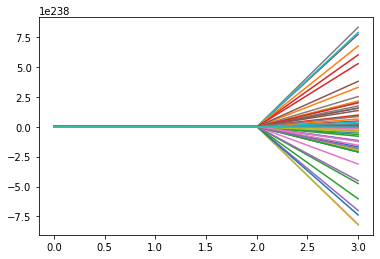

In [49]:
plt.plot(ys[-6:-2]);

/home/shyam/.local/lib/python3.9/site-packages/numpy/linalg/linalg.py:2559: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


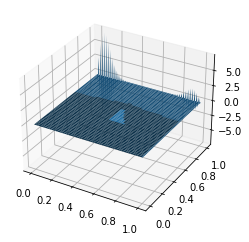

In [50]:
x, y = np.meshgrid(np.linspace(0,1,len(ts)),np.linspace(0,1,len(xs)))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,ys);
